In [119]:
##스타트업 파일

from scipy.stats import norm
import numpy as np
import scipy as sp
from pandas.core import datetools 
import pandas as pd
import statsmodels.api as sm ## R 패키지에서 불러온것, 샘플데이터 옮겨쓸수 있는 프로젝트 있음. 회귀분석에 유용 
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import sklearn as sk 
## 전처리 

import matplotlib as mpl
mpl.use('Agg')
import matplotlib.pylab 
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

import seaborn as sns
sns.set()
sns.set_style("whitegrid")
sns.set_color_codes()

C:\Users\User\Anaconda3\lib\site-packages\matplotlib\__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [139]:
df = pd.read_csv("http://www.stat.tamu.edu/~sheather/book/docs/datasets/profsalary.txt",sep ="\t")

In [140]:
df.tail()

,Case,Salary,Experience
138,139,43,3
139,140,63,12
140,141,67,16
141,142,71,20
142,143,69,31


In [168]:
model = sm.OLS.from_formula("Salary ~ Experience",data = df)
result= model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.675
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     293.3
Date:                Thu, 26 Oct 2017   Prob (F-statistic):           2.91e-36
Time:                        20:24:44   Log-Likelihood:                -453.96
No. Observations:                 143   AIC:                             911.9
Df Residuals:                     141   BIC:                             917.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     48.5059      1.088     44.579      0.0

In [169]:
model1 = sm.OLS.from_formula("Salary ~ Experience+I(Experience**2)+I(Experience**3)",data = df)
result1= model1.fit()
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     577.1
Date:                Thu, 26 Oct 2017   Prob (F-statistic):           3.17e-78
Time:                        20:24:46   Log-Likelihood:                -348.55
No. Observations:                 143   AIC:                             705.1
Df Residuals:                     139   BIC:                             716.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             35.8320      1

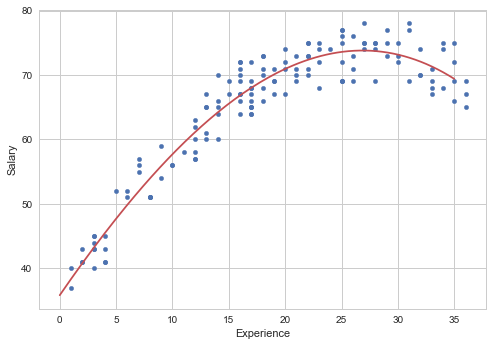

In [170]:
## 정답

df.plot(x ="Experience",y= "Salary",kind="scatter")
## x값들 새로 생성(그래프 x 축을 참고함) df 데이터 개수만큼 생성 
xnew = pd.DataFrame(np.linspace(0,35,len(df)),columns = ["Experience"])## 컬럼 꼭 이름 정해줘야함 안그럼 못알아들음

ynew = result1.predict(xnew)
plt.plot(xnew,ynew,'r-')


In [171]:
result1.resid ## y-y^잔차 

0     -2.752440
1     -1.078401
2      0.652905
3      0.976873
4      2.304712
5      1.418248
6     -3.406270
7     -0.839767
8      0.160233
9      2.160233
10     2.247560
11     5.160233
12    -4.581752
13    -0.467747
14     3.976873
15     0.876425
16     1.123294
17    -3.023127
18    -0.752440
19     5.054818
20    -4.023127
21    -1.226244
22     1.281724
23     4.297781
24    -4.581752
25     4.054818
26    -2.081318
27    -1.167566
28     5.593730
29     1.297408
         ...   
113   -0.023127
114   -0.508676
115    0.215311
116   -4.173474
117    5.307429
118    3.418248
119    1.838888
120   -2.695288
121   -2.702592
122    0.896537
123   -3.331433
124   -0.173474
125   -4.467747
126    3.418248
127   -3.103463
128   -2.467747
129    4.201260
130    1.918682
131   -2.081318
132   -2.023127
133   -4.467747
134    1.832434
135    0.710951
136    1.838888
137    0.281724
138   -0.161112
139    1.876425
140    0.160233
141    0.054431
142   -3.692571
Length: 143, dtype: floa

In [182]:
inf = result1.get_influence()## 영향도 행렬 구함 
hat = inf.hat_matrix_diag ## 레버리지 구함

idx = hat>3*np.mean(hat) ## 레버리지가 평균값의 3배 또는 hat.mean()
df[idx]

#predict = result1.predict(df)
#predict

,Case,Salary,Experience
21,22,67,36
40,41,65,36
46,47,40,1
60,61,37,1
65,66,69,36


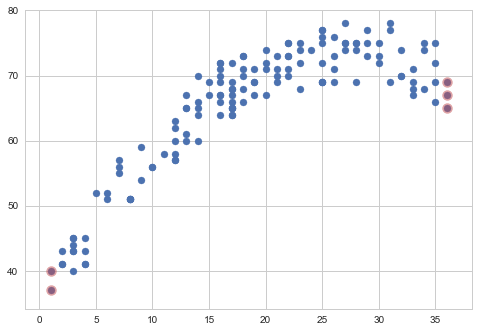

In [180]:
plt.scatter(df.Experience,df.Salary)

plt.scatter(df.Experience[idx],df.Salary[idx],s=100,c="r",alpha=0.5)
## 독립변수 Experience가 1또는 36이고 종속변수 salary 가 그에상응하는 값을 가진 점을 표시해준다(위참조)

In [222]:
df2 = pd.read_csv("http://www.stat.tamu.edu/~sheather/book/docs/datasets/defects.txt",sep ="\t")

In [223]:
df2.tail()

,Case,Temperature,Density,Rate,Defective
25,26,2.44,23.47,236.0,36.7
26,27,1.87,26.51,237.3,24.5
27,28,1.45,30.70,221.0,2.8
28,29,2.82,22.30,253.2,60.8
29,30,1.74,28.47,207.9,10.5


In [224]:
model2 = sm.OLS.from_formula("Defective ~ scale(Temperature)+scale(Density)+scale(Rate)",data = df2)
result2= model2.fit()
print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:              Defective   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     63.36
Date:                Fri, 27 Oct 2017   Prob (F-statistic):           4.37e-12
Time:                        21:33:21   Log-Likelihood:                -99.268
No. Observations:                  30   AIC:                             206.5
Df Residuals:                      26   BIC:                             212.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             27.1433      1

In [101]:
## 내답
#DefectiveH = result2.predict(df2)
#mode3 = pd.concat([DefectiveH,df2],axis =1)
#mode4 = mode3.set_index(0)
ypred.tail()

25    34.216723
26    19.649096
27     3.337283
28    44.472054
29    10.545548
dtype: float64

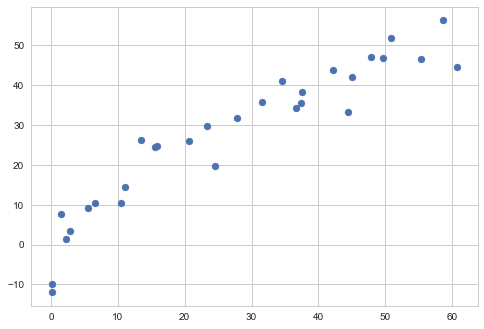

In [225]:
## 문제: 실제.Defective와 이모형에서 예측한 Defective 간의(비선형함수변환)회귀모형을 구하여 다음과 같이 실제 데이터와 회귀결과를 플롯으로 나타내라 

## 정답
ypred = result2.predict(df2)
df3 = df2.copy()
df3['DefectiveHat'] = ypred
df3
plt.scatter(df3.Defective, df3.DefectiveHat)

In [226]:
## 정답 
model2 =sm.OLS.from_formula("DefectiveHat~ np.sqrt(Defective)",data =df3)
result2 = model2.fit()
print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:           DefectiveHat   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     456.3
Date:                Fri, 27 Oct 2017   Prob (F-statistic):           7.17e-19
Time:                        21:34:14   Log-Likelihood:                -86.351
No. Observations:                  30   AIC:                             176.7
Df Residuals:                      28   BIC:                             179.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -9.8560      1

In [227]:
df3

,Case,Temperature,Density,Rate,Defective,DefectiveHat
0,1,0.97,32.08,177.7,0.2,-11.956281
1,2,2.85,21.14,254.1,47.9,47.179110
2,3,2.95,20.65,272.6,50.9,51.841820
3,4,2.84,22.53,273.4,49.7,46.731325
4,5,1.84,27.43,210.8,11.0,14.392247
5,6,2.05,25.42,236.1,15.6,24.394790
6,7,1.50,27.89,219.1,5.5,9.054080
7,8,2.48,23.34,238.9,37.4,35.435910
8,9,2.23,23.97,251.9,27.8,31.782757
9,10,3.02,19.45,281.9,58.7,56.245634


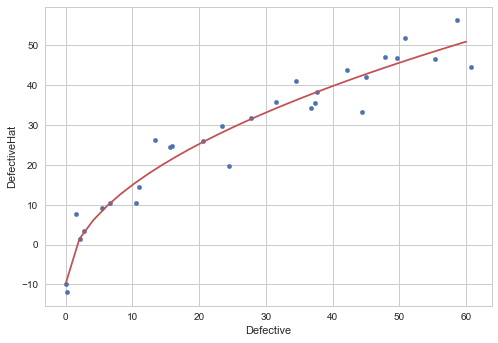

In [228]:
## 정답

df3.plot(x = "Defective",y = "DefectiveHat",kind = "scatter")
xnew = pd.DataFrame(np.linspace(0,60,len(df3)),columns = ["Defective"])
ynew = result2.predict(xnew)
plt.plot(xnew,ynew,"r-")

In [236]:
## 정답
## 원래의 선형회귀 모형에서 y대신 두번째 모형에서 구한 비선형 변환된y를 사용하여 회귀모형의 성능을 향상시킨다. 

model4 = sm.OLS.from_formula("np.sqrt(Defective) ~scale(Temperature)+scale(Density)+scale(Rate)",data = df2)


result4= model4.fit()
print(result4.summary())

                            OLS Regression Results                            
Dep. Variable:     np.sqrt(Defective)   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     143.5
Date:                Fri, 27 Oct 2017   Prob (F-statistic):           2.71e-16
Time:                        21:40:15   Log-Likelihood:                -23.438
No. Observations:                  30   AIC:                             54.88
Df Residuals:                      26   BIC:                             60.48
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              4.7160      0

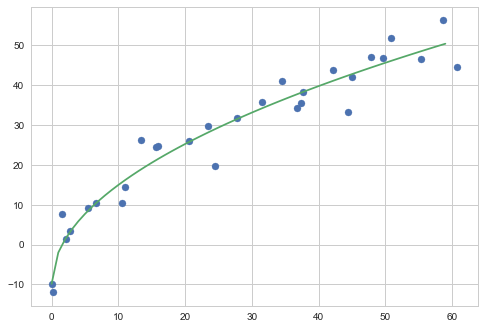

In [237]:
##고광빈님 정답
plt.scatter(df3['Defective'], df3['DefectiveHat'])

x2 = np.array(range(0,60,1))
y2 = -9.8560 + 7.8455 * np.sqrt(x2)
plt.plot (x2, y2, 'g')

plt.show()

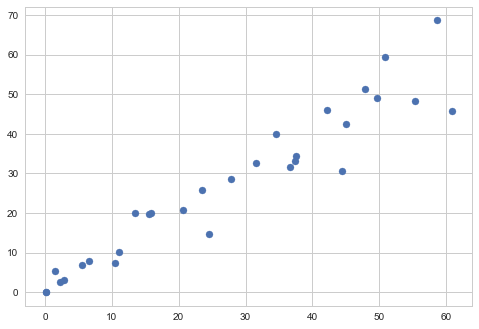

In [240]:
## 원래의 선형회귀 모형에서 y대신 두번째 모형에서 구한 비선형 변환된y를 사용하여 회귀모형의 성능을 향상시킨다. 
df3 = df2.copy()
df3["DefectiveHat"] = result4.predict(df3)**2
plt.scatter(df3.Defective,df3.DefectiveHat)